<h1 style="color:lightblue;">Statistics & Probability</h1>


**This jupyter notebook is devided into different sections.**

**Sections are devided by a <span style="color:red;">red dotted</span> line.**

<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Imports</h3>

This section is importing all the libraries and modules that are needed for the Notebook to work.

<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Variables & Data</h3>

This section is defining variables that can be used for different computations.

<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Basic Functions</h3>

This section has basic functions that can be executed on the data.

<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Advanced Functions</h3>

This section holds advanced statistics functions that can be executed on the data.

Advanced functions are devided by a <span style="color:green;">green dotted</span> line.


<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Class Exercises</h3>

This section holds class exercises.

Class exercises are devided by a <span style="color:green;">green dotted</span> line.


<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Imports</h1>

Imports need to be made when starting the notebook.

In [ ]:
import os
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statistics
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri

# 

<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Variables & Data</h1>

### Change to Data Directory
This is needed to import directly from path!

In [ ]:
os.chdir('/Users/mstring/GitHub/FHNW-2023/Statistics/data')
!ls -l


---

### Import R Data

- rdata
- dfr

In [ ]:
# Importing R Data:
rdata = pyreadr.read_r('SimpleReg.RData')
print(rdata.keys())

In [ ]:
# Converting R Data to a Dataframe:
dfr = (rdata['dat'])
print(dfr)

---

### Read a Text File to DF


Housingprices.txt --> df

In [ ]:
# Read a text file with tab as separator on Mac and Fedora: 
df = pd.read_csv('housingprices.txt',  sep='\t')
#df = pd.read_csv('ticketprices.txt',  sep='\t')

In [ ]:
# Visualize content of dataframe
print(df.head())
print(df.tail())

---

### Import AER Package

In [ ]:
# Import the AER package
AER = rpackages.importr('AER')

# Load the Grunfeld dataset
grunfeld_rdf = ro.r('data("Grunfeld", package = "AER"); Grunfeld')

# Convert the R dataframe to a pandas dataframe
pandas2ri.activate()
grunfeld_df = pandas2ri.rpy2py(grunfeld_rdf)

print(grunfeld_df)

# 

<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Basic Functions</h1>

### Line Plot

In [ ]:
# data defined locally
years = [2006 + x for x in range(16)]
weight = [80, 83, 84, 85, 86, 82, 81, 79, 79, 83, 80, 82, 82, 
          83, 81, 80]


# print length
print(len(years))
print(len(weight))


# plt.plot shows a line graph - standart behaviour
plt.plot(years, weight, c='r', lw=3, linestyle='--')
plt.show()

---

### Bar Plot

In [ ]:
"""
Args:
    data is defined locally
Returns:
    basic bar plot
"""

x = ['C++', 'C#', 'Python', 'Java', 'Go']
y = [20, 50, 140, 1, 4]


plt.bar(x, y, color='blue', align='edge', width=0.5, edgecolor='green', linewidth=6)
plt.show()

---

### Scatter Plot 

In [ ]:
# SimpleReg.RData 
print(dfr)

In [ ]:
"""
Args:
    param1: dfr from housingprices.txt, format is a dataframe
Returns:
    scatter plot
"""

# Remove rows where 'RENT' is NaN
dfr = dfr.dropna(subset=['RENT'])  

plt.scatter(dfr['RENT'], dfr['HOUSEHOLD_INCOME'], c='red')
plt.xlabel('Rent')
plt.ylabel('Household Income')
plt.title('Scatter plot of Rent vs Household Income')
plt.show()

---

### Boxplot

In [ ]:
# Import SimpleReg.RData to df
print(df)

In [ ]:
# Create Boxplot
boxplot = df.boxplot(column = 'Price', by='Bedrooms')
boxplot.set_ylabel('Price')
boxplot.set_xlabel('Bedrooms')
plt.show()

---

### Mode

The mode is the most common value in a dataset. 

In [ ]:
# Print DF Head (Import eg. SimpleReg.RData or defined locally)
print(df.head())

In [ ]:
# Sample Data in a list (Data type)
list_1 = [8, 8, 5, 3, 3, 3, 6, 2, 10]

In [ ]:
# Create a DataFrame
# A and B are the collumn names (vertically), so there are 2 collumns and 8 rows.
df = pd.DataFrame({
   'A': [1, 2, 2, 3, 4, 4, 4, 5],
   'B': [5, 6, 7, 8, 8, 10, 11, 12]
})

In [ ]:
mode = statistics.mode(list_1)

In [ ]:
# Calculate the mode
mode = df['A'].mode()
mode_2 = df.mode()

In [ ]:
print(mode)

In [ ]:
print(mode_2)

---

### Mean

The mean is the average of all values.

In [ ]:
# Print DF Head (Import eg. SimpleReg.RData or defined locally)
print(df.head())

In [ ]:
# Sample Data in a list (Data type)
list_1 = [8, 8, 5, 3, 3, 3, 6, 2, 10]

In [ ]:
mode = statistics.mode(list_1)

In [ ]:
# Create a DataFrame
# A and B are the collumn names (vertically), so there are 2 collumns and 8 rows.
df = pd.DataFrame({
   'A': [1, 2, 2, 3, 4, 4, 4, 5],
   'B': [5, 6, 7, 8, 8, 10, 11, 12]
})

In [ ]:
# Calculate the mode
mode = df['A'].mode()
mode_2 = df.mode()

In [ ]:
print(mode)

In [ ]:
print(mode_2)

---

### Median

The median is the the value that lays on the midpoint of a distribution.
50% are above, and 50% are below the value.

In [ ]:
list_2 = [8, 8, 5, 3, 3, 3, 6, 2, 10]

In [ ]:
# Sorting the list according to values. This does not need to be done to find the median.
list_2.sort()

In [ ]:
print(list_2)

In [ ]:
# The median can also be found for a dataframe with the pandas library.
# The function df.median() is used. When applying the function to a dataframe, the median for each collumn is the output.
# To output it for the whole dataframe, it needs to be flattened with the melt function.
median = statistics.median(list_2)

In [ ]:
print(median)

---

### Quantiles

The quantile divides the distribution, so that X % of the observations are below, and (1-X %) of the
observations are above the value of the quantile.

In [ ]:
list_3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
first_quantile = np.percentile(list_3, 25)

In [ ]:
print(first_quantile)

---

### Correlation Coefficient

Correlation measures the strength of the linear association between two quantitative variables.
It measures, how close a the values are to a perfectly linear slope. (The slope that would fit best)
Values can only range from -1 to 1 inclusive, from perfectly negative to perfectly positive.

In [ ]:
np.random.seed(1234)
#random_values = np.random.randint(low=1, high=101, size=100) 

df_correlation = pd.DataFrame(np.random.randint(low=1, high=101, size=(100, 2)), columns=list('XY'))

print(df_correlation.head())
print(df_correlation.tail())

In [ ]:
r = df_correlation.corr()
print(r)

---

# 

<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Advanced Functions</h1>

# Linear Regression with SKLearn

## Level - Level

The equation for a simple linear regression model is:

$$y_i = b_0 + b_1 \cdot x_i + e_i$$

This can be compared to the equation of a line, which is:

$$y = m \cdot x + q$$

Here's how the terms correspond:

- $y_i$ is the dependent variable (like $y$ in the line equation).
- $b_0$ is the y-intercept (like $q$ in the line equation).
- $b_1$ is the slope of the line (like $m$ in the line equation).
- $x_i$ is the independent variable (like $x$ in the line equation).
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values. This term doesn't have a direct equivalent in the simple line equation.

In a statistical context, $y_i = b_0 + b_1 \cdot x_i + e_i$ is a simple linear regression model, which predicts the dependent variable $y_i$ based on the independent variable $x_i$, with some error term $e_i$. The coefficients $b_0$ and $b_1$ are estimated from the data.


In [124]:
# Import SimpleReg.RData to df
print(df)

       Price  Living Area  Bedrooms  Bathrooms  Fireplaces  Age
0     142212         1982         3        1.0           0  133
1     134865         1676         3        1.5           1   14
2     118007         1694         3        2.0           1   15
3     138297         1800         2        1.0           2   49
4     129470         2088         3        1.0           1   29
...      ...          ...       ...        ...         ...  ...
1052  107695         1802         4        2.0           1   56
1053  236737         3239         4        3.5           2    1
1054  154829         1440         2        2.0           1   66
1055  179492         2030         3        2.5           1    3
1056  189108         2097         3        2.5           1   10

[1057 rows x 6 columns]


In [125]:
# Apply a filter if needed
df_filter = df[df['Bathrooms'] == 1.0]
print(df_filter)

       Price  Living Area  Bedrooms  Bathrooms  Fireplaces  Age
0     142212         1982         3        1.0           0  133
3     138297         1800         2        1.0           2   49
4     129470         2088         3        1.0           1   29
7     108794         1464         2        1.0           0   87
8      68353         1216         2        1.0           0  101
...      ...          ...       ...        ...         ...  ...
1028  199733          840         2        1.0           0   50
1030  106950         1472         3        1.0           1   28
1037   67951         1040         2        1.0           0   19
1038  121798         1308         3        1.0           0   29
1047  107973         1388         3        1.0           0   60

[197 rows x 6 columns]


In [126]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['Age','Price'])

In [127]:
# Independent Variable X (Provide)
x = df[['Bedrooms']]

# Dependent Variable Y (Predict)
y = df[['Price']]

# Find the mean linear regression of all the values
model = LinearRegression()
model.fit(x,y)

LinearRegression()

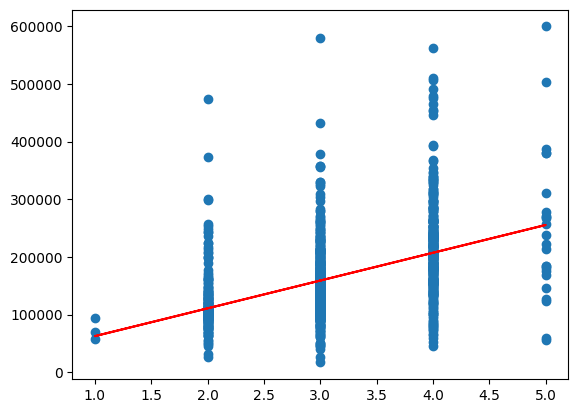

In [128]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [129]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

y-Intercept = 14349.484005688515
Slope = 48218.91218240856


In [130]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
float(predicted_y(3)[0][0])

159006.2205529142

---

## Log - Level

The equation for a log-level regression model is:

$$\log(y_i) = b_0 + b_1 \cdot x_i + e_i$$

Here's how the terms correspond:

- $\log(y_i)$ is the natural logarithm of the dependent variable.
- $b_0$ is the y-intercept.
- $b_1$ is the slope of the line.
- $x_i$ is the independent variable.
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values.

In this model, a one-unit change in $x_i$ is associated with a $b_1$ percent change in $y_i$. This is because when $y_i$ is logged, the coefficient $b_1$ can be interpreted as a percentage change rather than a unit change. The error term $e_i$ accounts for any random variation not explained by the model.

This model assumes that the relationship between $x_i$ and $\log(y_i)$ is linear. It's often used in situations where the effect of changes in the independent variable on the dependent variable are multiplicative rather than additive. The coefficients $b_0$ and $b_1$ are estimated from the data.

Please note that this interpretation assumes that all other assumptions of linear regression (such as independence of errors) are met. If these assumptions are violated, then this interpretation may not be valid.


In [ ]:
# Import SimpleReg.RData to df
print(df)

In [ ]:
# Apply a filter if needed
df_filter = df[df['Bathrooms'] == 1.0]
print(df_filter)

In [ ]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['Age','Price'])

In [ ]:
# Independent Variable X (Provide)
x = df[['Bedrooms']]

# Dependent Variable Y (Predict)
# Apply a log transformation to the 'Price' column
y = np.log(df[['Price']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
float(predicted_y(3)[0][0])

---

## Level - Log

The equation for a level-log regression model is:

$$y_i = b_0 + b_1 \cdot \log(x_i) + e_i$$

Here's how the terms correspond:

- $y_i$ is the dependent variable.
- $b_0$ is the y-intercept.
- $b_1$ is the slope of the line.
- $\log(x_i)$ is the natural logarithm of the independent variable.
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values.

In this model, a one percent change in $x_i$ is associated with a change of $(0.01 \cdot b_1)$ units in $y_i$. This is because when $x_i$ is logged, the coefficient $b_1$ can be interpreted as a semi-elasticity. The error term $e_i$ accounts for any random variation not explained by the model.

This model assumes that the relationship between $\log(x_i)$ and $y_i$ is linear. It's often used in situations where the effect of changes in the independent variable on the dependent variable are multiplicative rather than additive. The coefficients $b_0$ and $b_1$ are estimated from the data.

Please note that this interpretation assumes that all other assumptions of linear regression (such as independence of errors) are met. If these assumptions are violated, then this interpretation may not be valid.

In [ ]:
# Import SimpleReg.RData to df
print(df)

In [ ]:
# Apply a filter if needed
df_filter = df[df['Bathrooms'] == 1.0]
print(df_filter)

In [ ]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['Age','Price'])

In [ ]:
# Independent Variable X (Provide)
# Apply a log transformation to the 'Bedrooms' column
x = np.log(df[['Bedrooms']])

# Dependent Variable Y (Predict)
y = df[['Price']]

# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
float(predicted_y(3)[0][0])

---

## Log - Log

The equation for a log-log regression model is:

$$\log(y_i) = b_0 + b_1 \cdot \log(x_i) + e_i$$

Here's how the terms correspond:

- $\log(y_i)$ is the natural logarithm of the dependent variable.
- $b_0$ is the y-intercept.
- $b_1$ is the slope of the line.
- $\log(x_i)$ is the natural logarithm of the independent variable.
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values.

In this model, a one percent change in $x_i$ is associated with a $b_1$ percent change in $y_i$. This is because when both $y_i$ and $x_i$ are logged, the coefficient $b_1$ can be interpreted as an elasticity. The error term $e_i$ accounts for any random variation not explained by the model.

This model assumes that the relationship between $\log(x_i)$ and $\log(y_i)$ is linear. It's often used in situations where the effect of changes in the independent variable on the dependent variable are multiplicative rather than additive. The coefficients $b_0$ and $b_1$ are estimated from the data.

Please note that this interpretation assumes that all other assumptions of linear regression (such as independence of errors) are met. If these assumptions are violated, then this interpretation may not be valid.

In [ ]:
# Import SimpleReg.RData to df
print(df)

In [131]:
# Apply a filter if needed
df_filter = df[df['Bathrooms'] == 1.0]
print(df_filter)

       Price  Living Area  Bedrooms  Bathrooms  Fireplaces  Age
0     142212         1982         3        1.0           0  133
3     138297         1800         2        1.0           2   49
4     129470         2088         3        1.0           1   29
7     108794         1464         2        1.0           0   87
8      68353         1216         2        1.0           0  101
...      ...          ...       ...        ...         ...  ...
1028  199733          840         2        1.0           0   50
1030  106950         1472         3        1.0           1   28
1037   67951         1040         2        1.0           0   19
1038  121798         1308         3        1.0           0   29
1047  107973         1388         3        1.0           0   60

[197 rows x 6 columns]


In [ ]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['Age','Price'])

In [ ]:
# Independent Variable X (Provide)
# Apply a log transformation to the 'Bedrooms' column
x = np.log(df[['Bedrooms']])

# Dependent Variable Y (Predict)
# Apply a log transformation to the 'Price' column
y = np.log(df[['Price']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
float(predicted_y(3)[0][0])

---

# 

<hr style="border-top: 15px dotted green; border-bottom: none;">

## Multiple Regression Model

In [ ]:
# Visualize content of dataframe
print(df)

#### Define Variables

In [ ]:
# Variable 1 (Provide)
a = df[['Date']] 

# Variable 2 (Provide)
b = df[['Receipts']]

# Variable 3 (Provide)
c = df[['Paid Attendance']]

# Variable 4 (Provide)
d = df[['Shows']]

# Variable 5 (Provide)
e = df[['Avg Ticket Price']]

# Variable 6 (Provide)
#f = df[['']]

# Variable 7 (Provide)
#g = df[['']]

# Variable 8 (Provide)
#h = df[['']]

In [ ]:
# Define dependent variable
Y = df['Paid Attendance']

# Define independent variables
X = df[['Date', 'Receipts', 'Shows', 'Avg Ticket Price']]

# Create a Linear Regression object
lm = LinearRegression()

# Fit the model to the data
lm.fit(X, Y)

# Print out the coefficients
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

# 

<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Class Exercises</h1>

## Exercise Template